In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# 4.5.4b

In [2]:
def sample_mean_x(n, p):
    return np.random.binomial(n, p)/n

In [3]:
sample_mean_x(1000, 0.3)

0.29

In [4]:
def coverage_estimate(n, p, samples, epsilon):
    acc = 0
    for i in range(samples):
        temp_samp = sample_mean_x(n, p)
        if(abs(temp_samp - p) <= epsilon):
            acc += 1
    return acc / samples

In [5]:
alpha = 0.05
bernoulli_samples = 100
coverage_estimate(17, 0.3, 1000, np.sqrt(np.log(2/alpha)/(2 * bernoulli_samples) ))

0.797

In [6]:
n_arr = []
coverage_arr = []
interval_size_arr = []
for i in range(1,10000):
    n_arr.append(i)
    eps = np.sqrt(np.log(2/alpha)/(2 * i))
    interval_size_arr.append(eps)
    coverage_arr.append(coverage_estimate(i, 0.4, 1000, eps))

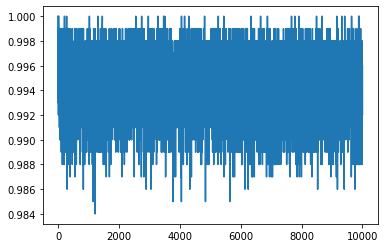

In [7]:
plt.plot(n_arr, coverage_arr)

# 4.5.4c

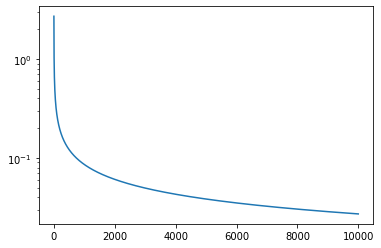

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_yscale('log')
plt.plot(n_arr, 2*np.array(interval_size_arr))

How large should n be if we want the length of the interval to be no more then 0.05?

Soln: 737 according to our experiment by bisecting interval size

In [9]:
def find_tolarence(delta):
    h_idx = len(interval_size_arr)
    l_idx = 0
    while h_idx - l_idx > 1:
        new_idx = int(np.floor((h_idx + l_idx)/2))
        print(new_idx)
        if interval_size_arr[new_idx] < delta:
            h_idx = new_idx
        else:
            l_idx = new_idx
    return h_idx, l_idx

In [10]:
find_tolarence(0.05)

4999
2499
1249
624
936
780
702
741
721
731
736
738
737


(737, 736)

# 4.6

In [53]:
def p_abs_z_g_t(t):
    return -1 * np.sqrt(2/np.pi) * integrate.quad(lambda x: np.exp(-x*x/2.0), 0, t)[0] + 1
def markov_bound(t, k):
    num_samples = 1000
    sampled_mean = np.sum(np.abs(np.random.normal(size=num_samples))**k)/num_samples
    return (np.sqrt(2/np.pi))/t**k
def mills_bound(t):
    return (np.sqrt(2/np.pi))*(np.exp((-1*t**2) /2))/t

In [54]:
p_abs_z_g_t(2)

0.04550026389635842

In [55]:
markov_bound(2, 5)*2

0.04986778505017909

In [56]:
mills_bound(2)

0.05399096651318806

In [59]:
x = np.linspace(0.0001, 10, num=20)

In [65]:
mills_bounds = []
markov_bound1 = []
markov_bound2 = []
markov_bound3 = []
markov_bound4 = []
markov_bound5 = []
p = []
for el in x:
    p.append(p_abs_z_g_t(el))
    mills_bounds.append(mills_bound(el))
    markov_bound1.append(markov_bound(el, 1))
    markov_bound2.append(markov_bound(el, 2))
    markov_bound3.append(markov_bound(el, 3))
    markov_bound4.append(markov_bound(el, 4))
    markov_bound5.append(markov_bound(el, 5))


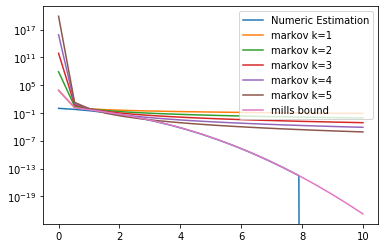

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_yscale('log')
plt.plot(x,p, label='Numeric Estimation')
plt.plot(x,markov_bound1, label='markov k=1')
plt.plot(x,markov_bound2, label='markov k=2')
plt.plot(x,markov_bound3, label='markov k=3')
plt.plot(x,markov_bound4, label='markov k=4')
plt.plot(x,markov_bound5, label='markov k=5')
plt.plot(x,mills_bounds, label='mills bound')
ax.legend()